# What Does this code do?
1) Import index returns
2) Convert date strings to datetime, and only keep dates greater than Jan 1 1975.
3) Calculate "trend" components (assuming quarterly seasonality), add these features to the dataframe.
4) Take 1st and 2nd derivatives of trend components to get velocity and acceleration features.
5) Only include quarterly data (last day of each month)
5) Export cleaned data to csv to use in master dataframes later.

In [1]:
# Most if not all imports
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.tsa.api as tsa # Use this for exponential smoothing.
from datetime import datetime

In [11]:
# Start with sp500 data. This data is sorted in chronological order.
sp500_raw = pd.read_csv(r"C:\Users\Edmund\OMSA\MGT6203\group project\Team36_group_project\Data\spx RETURN.csv")
display(sp500_raw.head())
print(type(sp500_raw['DATE'].iloc[4]))
# get index where 'DATE' == '1/1/1975'
sp500_min_idx = (sp500_raw.index[sp500_raw['DATE'] == '1/2/75'].to_list())[0]
print(sp500_min_idx)
sp500_cut = sp500_raw[sp500_min_idx:] # only include data from 1975 onward
display(sp500_cut.head(12))
display(sp500_cut.tail(12))

,DATE,PRICE,RETURN
0,#NAME?,17.66,#REF!
1,1/3/28,17.76,0.005662514
2,1/4/28,17.72,-0.002252252
3,1/5/28,17.55,-0.009593679
4,1/6/28,17.66,0.006267806


<class 'str'>
11759


,DATE,PRICE,RETURN
11759,1/2/75,70.23,0.024358226
11760,1/3/75,70.71,0.006834686
11761,1/6/75,71.07,0.005091218
11762,1/7/75,71.02,-0.000703532
11763,1/8/75,70.04,-0.01379893
11764,1/9/75,71.17,0.016133638
11765,1/10/75,72.61,0.020233244
11766,1/13/75,72.31,-0.004131662
11767,1/14/75,71.68,-0.008712488
11768,1/15/75,72.14,0.006417411


,DATE,PRICE,RETURN
24041,9/14/23,4505.10,0.008429884
24042,9/15/23,4450.32,-0.012159553
24043,9/18/23,4453.53,0.000721296
24044,9/19/23,4443.95,-0.002151103
24045,9/20/23,4402.20,-0.009394795
24046,9/21/23,4330.00,-0.01640089
24047,9/22/23,4320.06,-0.002295612
24048,9/25/23,4337.44,0.004023092
24049,9/26/23,4273.53,-0.014734498
24050,9/27/23,4274.51,0.000229319


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\Edmund\AppData\Local\Temp\ipykernel_32724\432567765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_cut['DATE'] = pd.to_datetime(sp500_cut['DATE'], format='%m/%d/%Y')


,DATE,PRICE,RETURN
11759,1975-01-02,70.23,0.024358226
11760,1975-01-03,70.71,0.006834686
11761,1975-01-06,71.07,0.005091218
11762,1975-01-07,71.02,-0.000703532
11763,1975-01-08,70.04,-0.01379893


,DATE,PRICE,RETURN
24048,2023-09-25,4337.44,0.004023092
24049,2023-09-26,4273.53,-0.014734498
24050,2023-09-27,4274.51,0.000229319
24051,2023-09-28,4299.70,0.005893073
24052,2023-09-29,4288.05,-0.002709491


datetime64[ns]
object


C:\Users\Edmund\AppData\Local\Temp\ipykernel_32724\432567765.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_cut['RETURN'] = pd.to_numeric(sp500_cut['RETURN'])


<AxesSubplot:xlabel='DATE'>

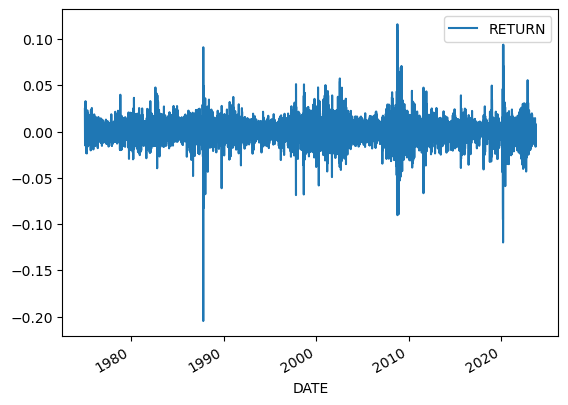

In [18]:
# now let's convert the 'DATE' column to datetime
sp500_cut['DATE'] = pd.to_datetime(sp500_cut['DATE'], format='%m/%d/%Y')
print(type(sp500_cut['DATE'].iloc[4]))
display(sp500_cut.head())
display(sp500_cut.tail())
print(sp500_cut['DATE'].dtype)
print(sp500_cut['RETURN'].dtype)
# try converting return to float, see how that goes.
sp500_cut['RETURN'] = pd.to_numeric(sp500_cut['RETURN'])
sp500_cut.plot(x = 'DATE', y = 'RETURN')

In [ ]:
# Ok. now that we have the date ranges and type that we want, it's time to get the trend components and the velocity and acceleration: